<a href="https://colab.research.google.com/github/allenphos/ML-course/blob/main/Copy_of_HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



https://github.com/allenphos/ML-course/blob/main/process_bank_churn.py

In [ ]:
!pip install ipython-autotime

In [ ]:
%load_ext autotime

time: 495 µs (started: 2025-02-13 19:33:27 +00:00)


In [27]:
#autoreload
%load_ext autoreload
%autoreload 2

time: 59 ms (started: 2025-02-13 19:54:08 +00:00)


In [191]:
from process_bank_churn import preprocess_data, preprocess_new_data

time: 26.9 ms (started: 2025-02-13 21:00:02 +00:00)


In [ ]:
?preprocess_data

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

time: 30.4 ms (started: 2025-02-13 19:58:13 +00:00)


In [34]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

# Download the dataset
od.download("https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2")
raw_df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/train.csv', index_col=0)

data = preprocess_data(raw_df, scale_numeric=False)

X_train = data['X_train']
train_targets = data['train_targets']
X_val = data['X_val']
val_targets = data['val_targets']


Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu-course-c-2" (use force=True to force download)
time: 4.22 s (started: 2025-02-13 19:58:17 +00:00)


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [143]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42) # Using a fixed random_state ensures that the results are reproducible; if you run the code again, you'll get the same tree structure.

%time
model.fit(X_train, train_targets)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


DecisionTreeClassifier(random_state=42)

time: 72.6 ms (started: 2025-02-13 20:38:47 +00:00)


In [144]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Функція для обчислення AUROC
def compute_auroc(inputs, targets, name=''):
    # Передбачаємо ймовірності класу 1
    y_pred_proba = model.predict_proba(inputs)[:, 1]

    # Обчислюємо AUROC
    roc_auc = roc_auc_score(targets, y_pred_proba)
    print(f'AUROC for {name}: {roc_auc:.2f}')

compute_auroc(X_train, train_targets, 'Training')
compute_auroc(X_val, val_targets, 'Validation')

AUROC for Training: 1.00
AUROC for Validation: 0.76
time: 37.7 ms (started: 2025-02-13 20:38:49 +00:00)


На тренувальніх даних модель показує Roc-score = 1, а на валідаційних = 0.76, тобто сталося перенавчання моделі.

In [42]:
train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

time: 33.1 ms (started: 2025-02-13 20:11:16 +00:00)


In [44]:
train_probs = model.predict_proba(X_train)

train_probs[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

time: 46.5 ms (started: 2025-02-13 20:11:49 +00:00)


In [45]:
model.score(X_val, val_targets) #This is a built-in method of the DecisionTreeClassifier object. It is used to evaluate the model's performance on a given dataset

0.8453333333333334

time: 40.9 ms (started: 2025-02-13 20:12:13 +00:00)


In [48]:
model.tree_.max_depth

24

time: 46.2 ms (started: 2025-02-13 20:16:19 +00:00)


## hyperparameters


In [49]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)

model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=2, random_state=42)

time: 40.6 ms (started: 2025-02-13 20:19:36 +00:00)


In [50]:
model.score(X_train, train_targets)

0.8651111111111112

time: 31.3 ms (started: 2025-02-13 20:19:38 +00:00)


In [51]:
model.score(X_val, val_targets)

0.8676666666666667

time: 30 ms (started: 2025-02-13 20:19:41 +00:00)


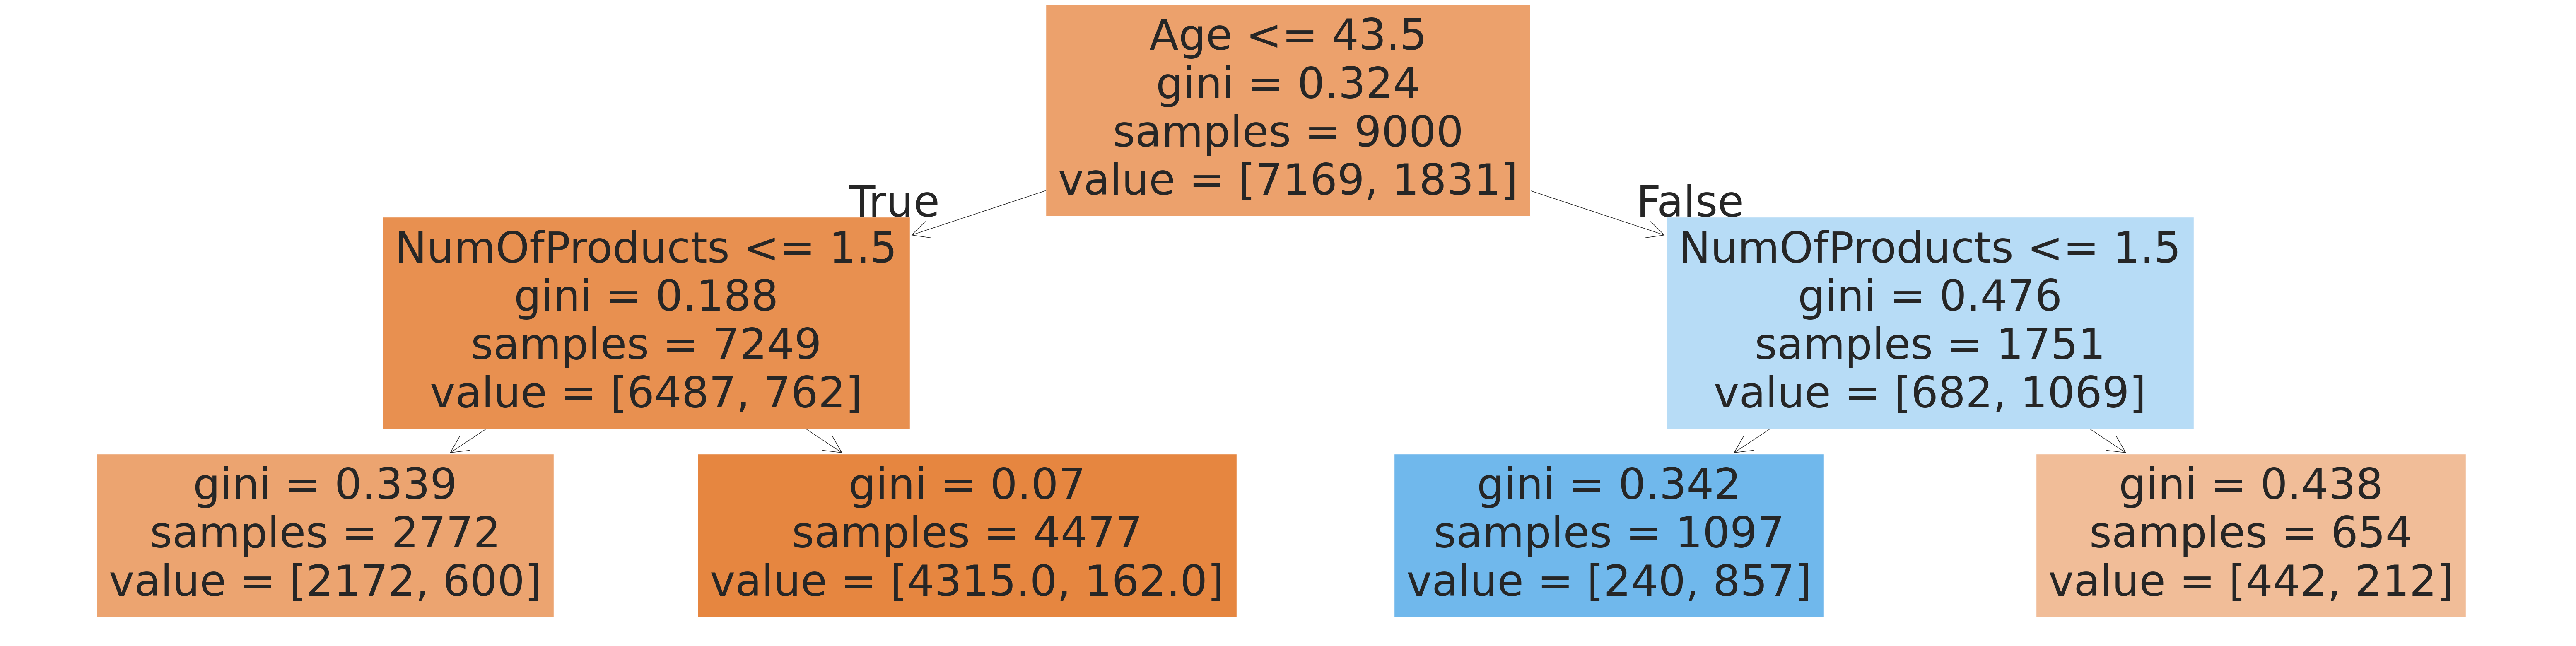

time: 1.69 s (started: 2025-02-13 20:19:45 +00:00)


In [52]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [53]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 0.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0
|--- Age >  43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 1.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0

time: 37.7 ms (started: 2025-02-13 20:21:01 +00:00)


Age та NumOfProducts являються найвпливовішими ознаками у прийнятті рішеннь деревом.

In [59]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
0,Age,0.718364
3,NumOfProducts,0.281636
1,Tenure,0.000000
2,Balance,0.000000
4,HasCrCard,0.000000
5,IsActiveMember,0.000000
6,EstimatedSalary,0.000000
7,Geography_France,0.000000
8,Geography_Germany,0.000000
9,Geography_Spain,0.000000


time: 36.5 ms (started: 2025-02-13 20:24:21 +00:00)


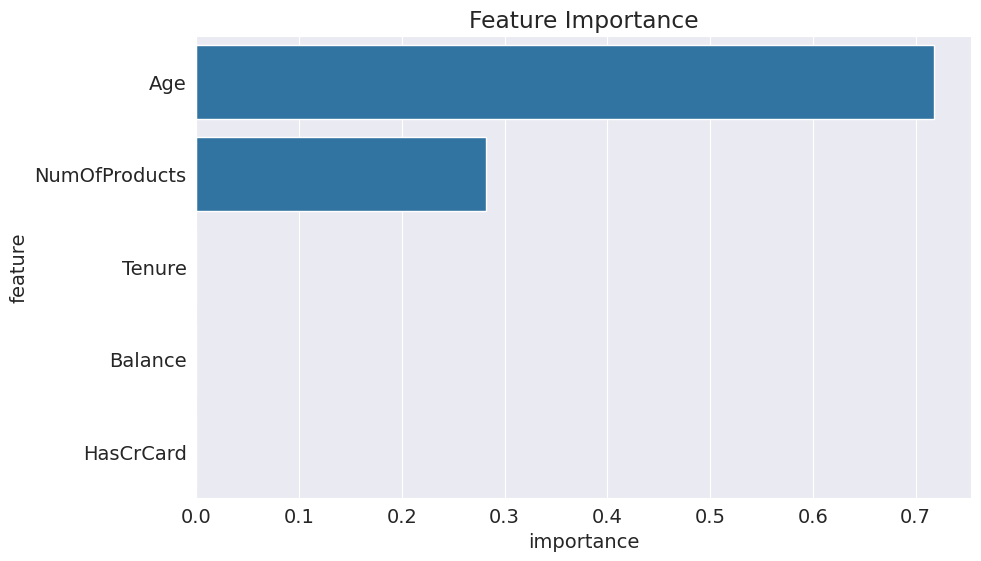

time: 251 ms (started: 2025-02-13 20:24:24 +00:00)


In [60]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(5), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [148]:
model = DecisionTreeClassifier(max_leaf_nodes=24, random_state=42)
model.fit(X_train, train_targets)

print('Train score', model.score(X_train, train_targets))
print('Train score', model.score(X_val, val_targets))

compute_auroc(X_train, train_targets, 'Training')
compute_auroc(X_val, val_targets, 'Validation')

Train score 0.9033333333333333
Train score 0.8986666666666666
AUROC for Training: 0.92
AUROC for Validation: 0.92
time: 88.8 ms (started: 2025-02-13 20:39:44 +00:00)


In [131]:
model.tree_.max_depth

8

time: 27.3 ms (started: 2025-02-13 20:30:50 +00:00)


In [167]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, train_targets)

print('Train score', model.score(X_train, train_targets))
print('Train score', model.score(X_val, val_targets))

compute_auroc(X_train, train_targets, 'Training')
compute_auroc(X_val, val_targets, 'Validation')

Train score 0.9042222222222223
Train score 0.8976666666666666
AUROC for Training: 0.94
AUROC for Validation: 0.92
time: 103 ms (started: 2025-02-13 20:42:11 +00:00)


Найкращі оцінки отримує модель з max_leaf_nodes=24 та max_depth=6: UROC for Validation: 0.92

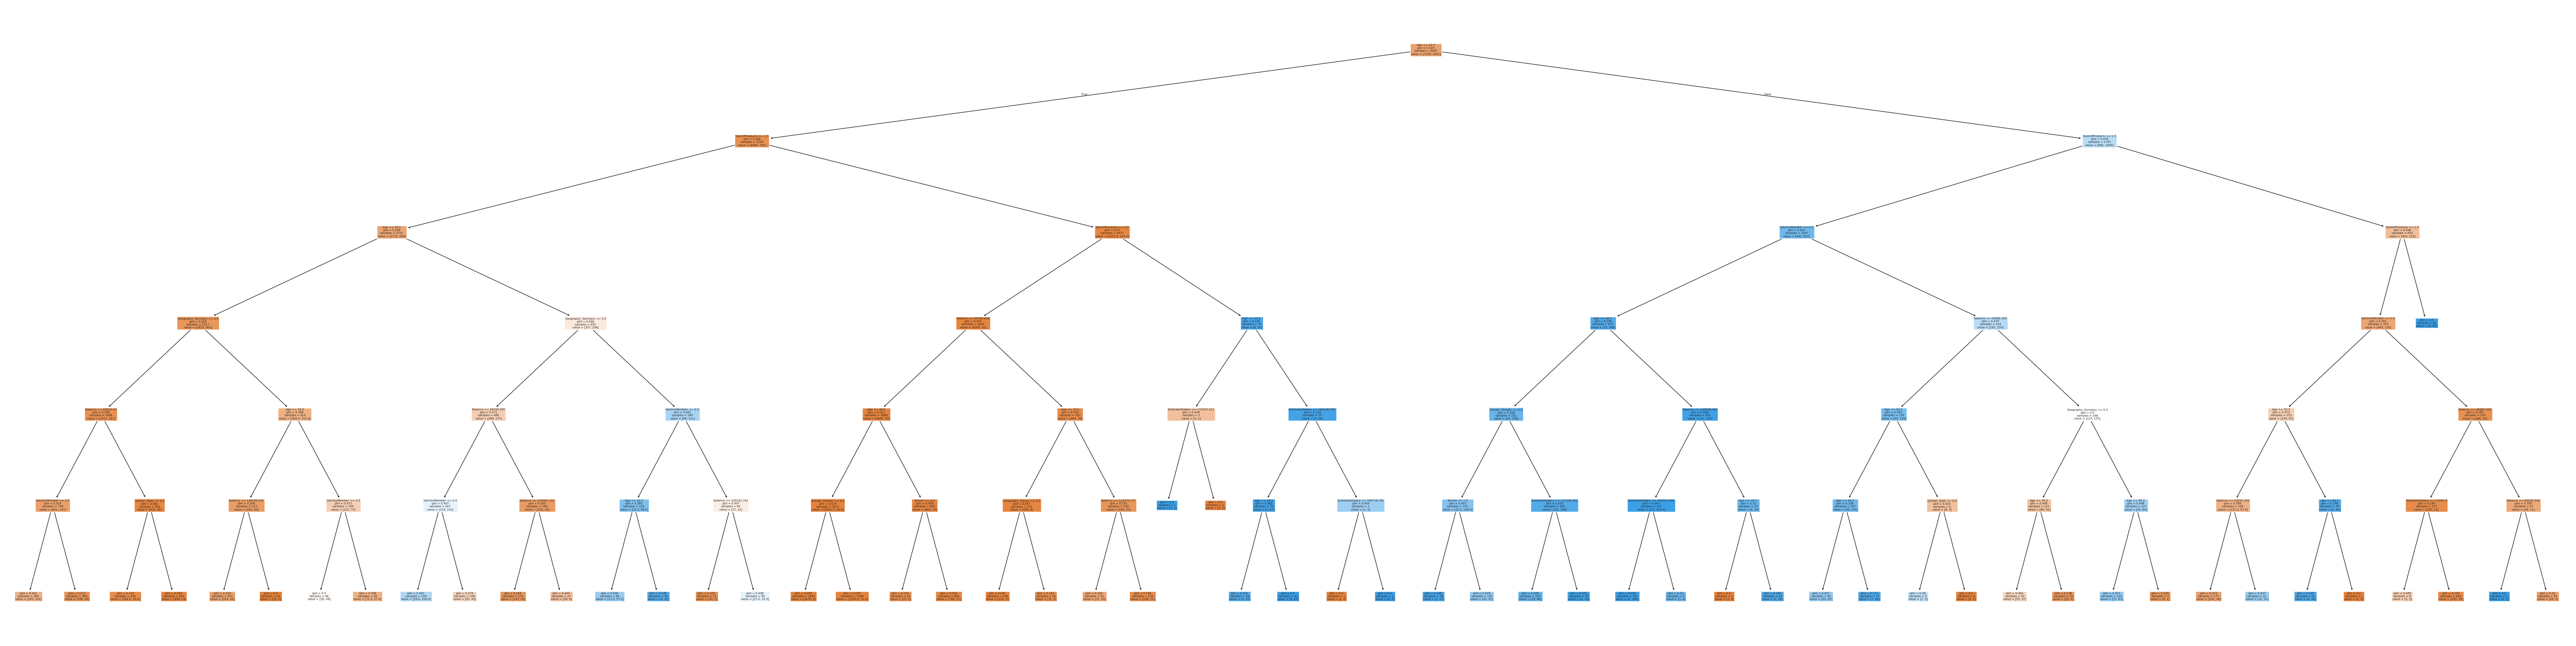

time: 4.64 s (started: 2025-02-13 20:44:24 +00:00)


In [173]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=6, filled=True);

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [184]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

time: 1.36 s (started: 2025-02-13 20:57:08 +00:00)


In [185]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.160444,0.160333
1,2,0.134889,0.132333
2,3,0.118667,0.118000
3,4,0.112667,0.113000
4,5,0.101333,0.102333
5,6,0.095778,0.102333
6,7,0.089556,0.108333
7,8,0.080333,0.112333
8,9,0.072222,0.121000
9,10,0.060000,0.124000


time: 34.2 ms (started: 2025-02-13 20:57:11 +00:00)


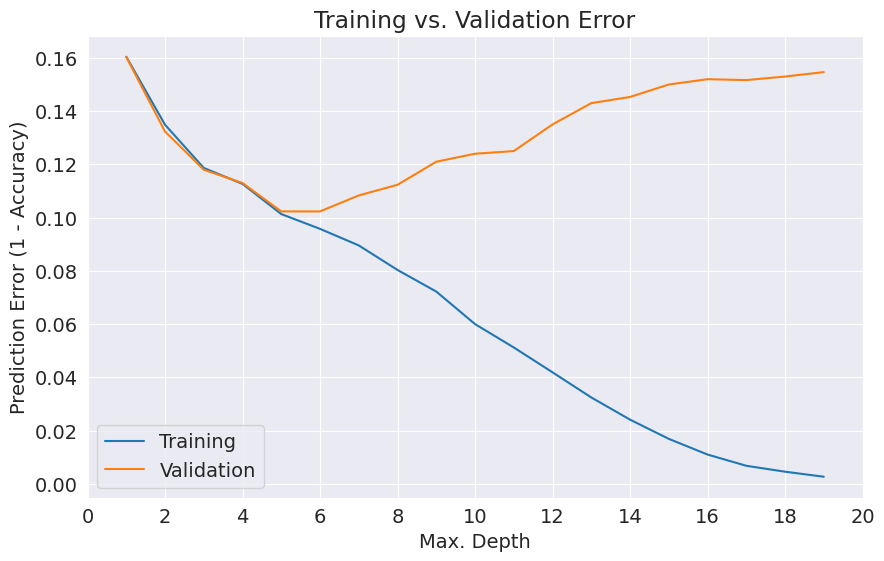

time: 314 ms (started: 2025-02-13 20:52:02 +00:00)


In [179]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

Найкращі значення дає модель на 5-6 глибині.

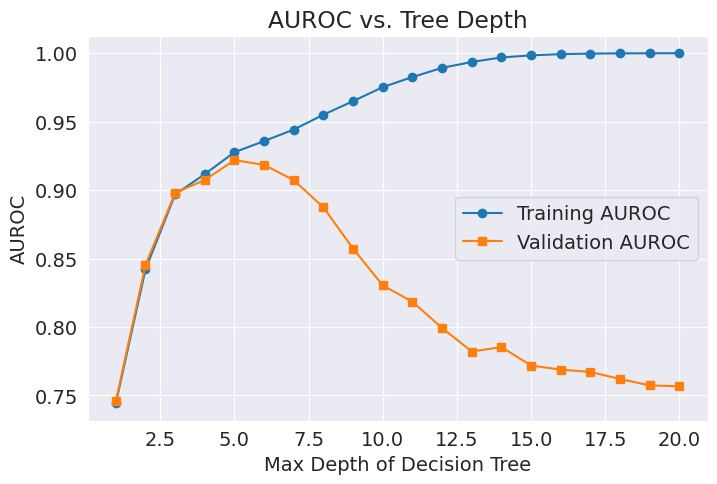

AUROC for Training: 1.00
AUROC for Validation: 0.76
time: 1.75 s (started: 2025-02-13 20:57:33 +00:00)


In [186]:
# Списки для збереження результатів
depths = list(range(1, 21))
train_auroc = []
val_auroc = []

# Цикл по max_depth від 1 до 20
for md in depths:
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)

    # Передбачення ймовірностей класу 1
    train_preds = model.predict_proba(X_train)[:, 1]
    val_preds = model.predict_proba(X_val)[:, 1]

    # Обчислення AUROC
    train_auroc.append(roc_auc_score(train_targets, train_preds))
    val_auroc.append(roc_auc_score(val_targets, val_preds))

# Побудова графіка залежності AUROC від глибини дерева
plt.figure(figsize=(8, 5))
plt.plot(depths, train_auroc, label='Training AUROC', marker='o')
plt.plot(depths, val_auroc, label='Validation AUROC', marker='s')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('AUROC')
plt.title('AUROC vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

compute_auroc(X_train, train_targets, 'Training')
compute_auroc(X_val, val_targets, 'Validation')

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [189]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

time: 60 ms (started: 2025-02-13 20:59:10 +00:00)


In [200]:
test_raw_df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/test.csv')

preprocessed_test = preprocess_new_data(test_raw_df, data['input_cols'], data['scaler'], data['encoder'])

# Make predictions using the trained model
predictions = model.predict_proba(preprocessed_test)[:,1] # Get the predictions

# Assign predictions to the 'Exited' column
test_raw_df['Exited'] = predictions

sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/sample_submission.csv')
sample_submission = sample_submission.reset_index(drop=True)
test_raw_df = test_raw_df.reset_index(drop=True)
sample_submission['Exited'] = test_raw_df['Exited']

sample_submission.to_csv('submission_tree.csv', index=False)

sample_submission['Exited']

,Exited
0,0.179372
1,0.027879
2,0.027879
3,0.784431
4,0.027879
...,...
9995,0.009762
9996,0.027879
9997,0.009762
9998,0.042105


time: 96.4 ms (started: 2025-02-13 21:07:52 +00:00)


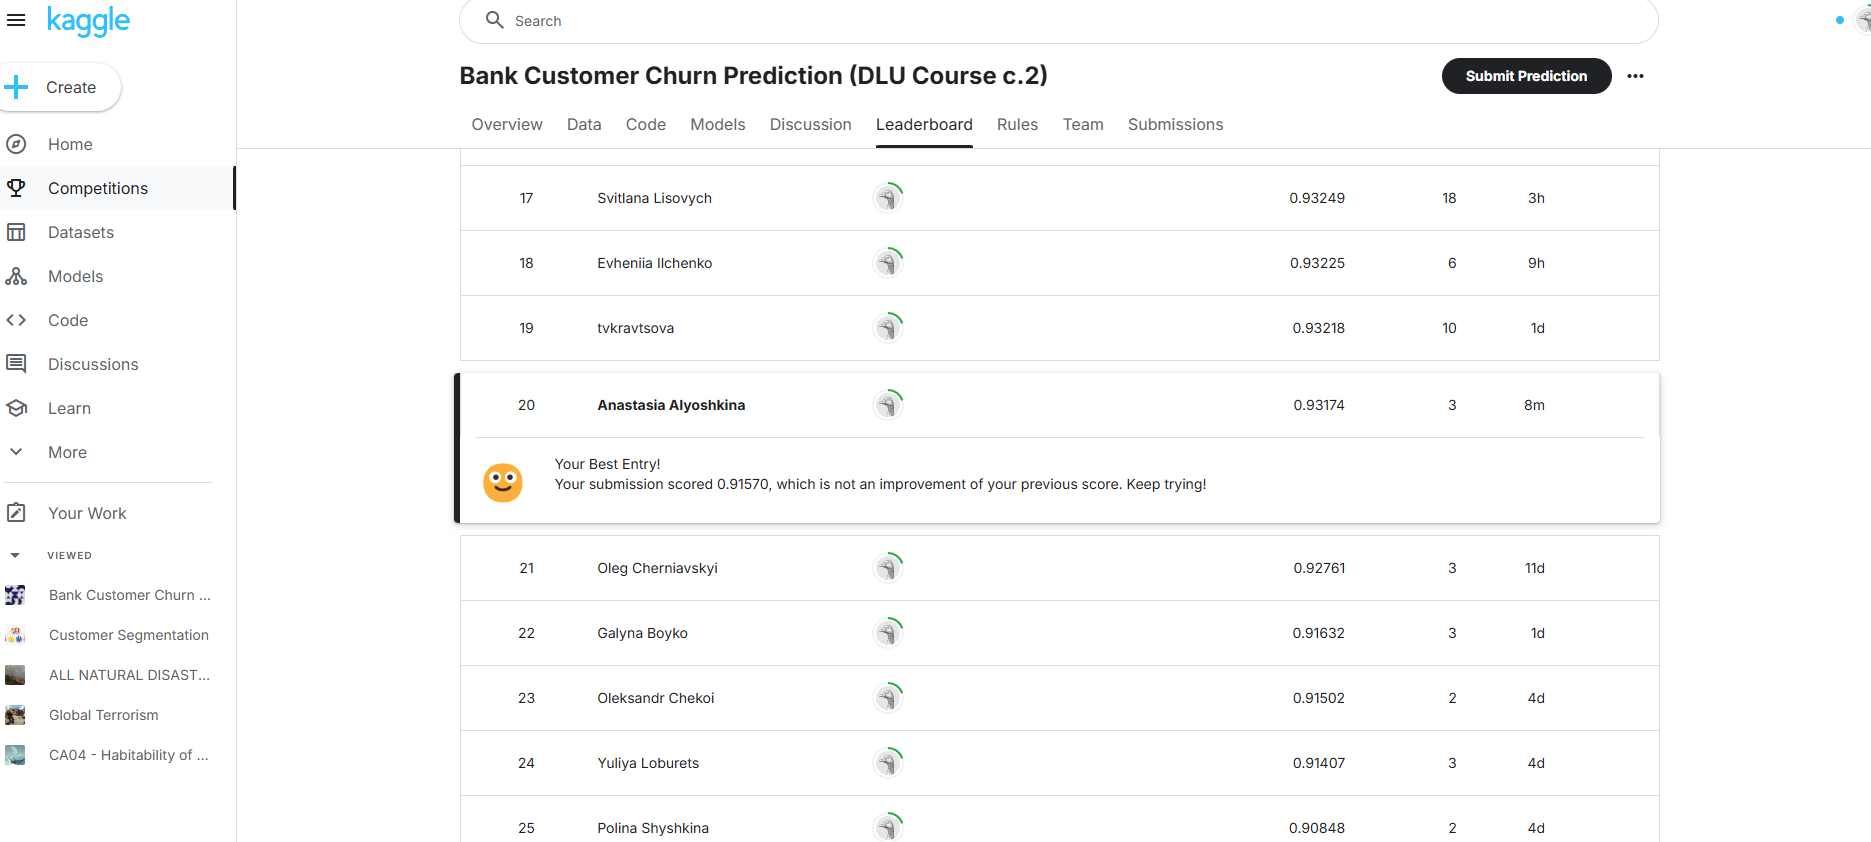